# Análisis Exploratorio de Datos

In [1]:
import pandas as pd
# from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

## Análisis General

In [2]:
df = pd.read_csv("sba_national.csv", low_memory=False)
print(df.shape)
df.sample(3)

(899164, 27)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
663922,6722974003,ORTEGA HIGHWAY CHEVRON,SAN JUAN CAPISTRANO,CA,92675,INTERNATL CITY BANK NATL ASSOC,CA,447110,24-Sep-03,2003,...,0,N,NaN,30-Nov-03,"$582,000.00",$0.00,P I F,$0.00,"$582,000.00","$436,500.00"
837589,8981424006,MANKIN CAR CARE INC,WESTMINSTER,MD,21157,"PNC BANK, NATIONAL ASSOCIATION",DE,811112,13-Jul-05,2005,...,0,N,NaN,31-Aug-05,"$197,000.00",$0.00,P I F,$0.00,"$197,000.00","$147,750.00"
249118,2753824009,BUSS STOP CHILDCARE INC,COLUMBIA,MO,65202,BOONE CNTY NATL BK OF COLUMBI,MO,624410,1-Feb-99,1999,...,0,N,27-Nov-01,31-Mar-99,"$95,000.00",$0.00,CHGOFF,"$66,814.00","$95,000.00","$76,000.00"


In [ ]:
# prof = ProfileReport(df)
# prof.to_file(output_file="../html/sba_national_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 19.23it/s]


In [3]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [4]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [5]:
df.iloc[:,1:].describe()

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,31184.159152,263318.312760,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


## Análisis Detallado

### LoanNr_ChkDgt
Identificador - Clave principal

In [6]:
nrows = df.shape[0]
nvar = df["LoanNr_ChkDgt"].nunique()
pvar = nvar / nrows

print(f"Numero de Claves: {nvar}")
print(f"Valores Distintos: {round(pvar * 100, 1)}%")

Numero de Claves: 899164
Valores Distintos: 100.0%


La variable LoanNr_ChkDgt al ser la clave principal tiene 100% de valores distintos

### Name
Nombre del prestatario

In [7]:
nrows = df.shape[0]
nvar = df["Name"].nunique()
pvar = nvar / nrows

print(f"Numero de Nombres: {nvar}")
print(f"Valores Distintos: {round(pvar * 100, 1)}%")

Numero de Nombres: 779583
Valores Distintos: 86.7%


La variable Name tiene una alta cardinalidad, con 86.7% de valores distintos

### City
Ciudad del prestatario

In [8]:
nrows = df.shape[0]
nvar = df["City"].nunique()
pvar = nvar / nrows

print(f"Numero de Ciudades: {nvar}")
print(f"Valores Distintos: {round(pvar * 100, 1)}%")

Numero de Ciudades: 32581
Valores Distintos: 3.6%


La variable City tiene 3.6% de valores distintos, que serian 32581 diferentes ciudades

### State
Estado del prestatario

In [9]:
df_st1 = df.groupby("State")["LoanNr_ChkDgt"].count()
df_st1 = pd.DataFrame(df_st1).reset_index()
df_st1.rename(columns={"LoanNr_ChkDgt":"Count"}, inplace=True)
df_st1["Frequency"] = round((df_st1["Count"] / df.shape[0]) * 100, 1)
df_st1.sort_values("Count", ascending=False).head(5)

,State,Count,Frequency
4,CA,130619,14.5
43,TX,70458,7.8
34,NY,57693,6.4
9,FL,41212,4.6
38,PA,35170,3.9


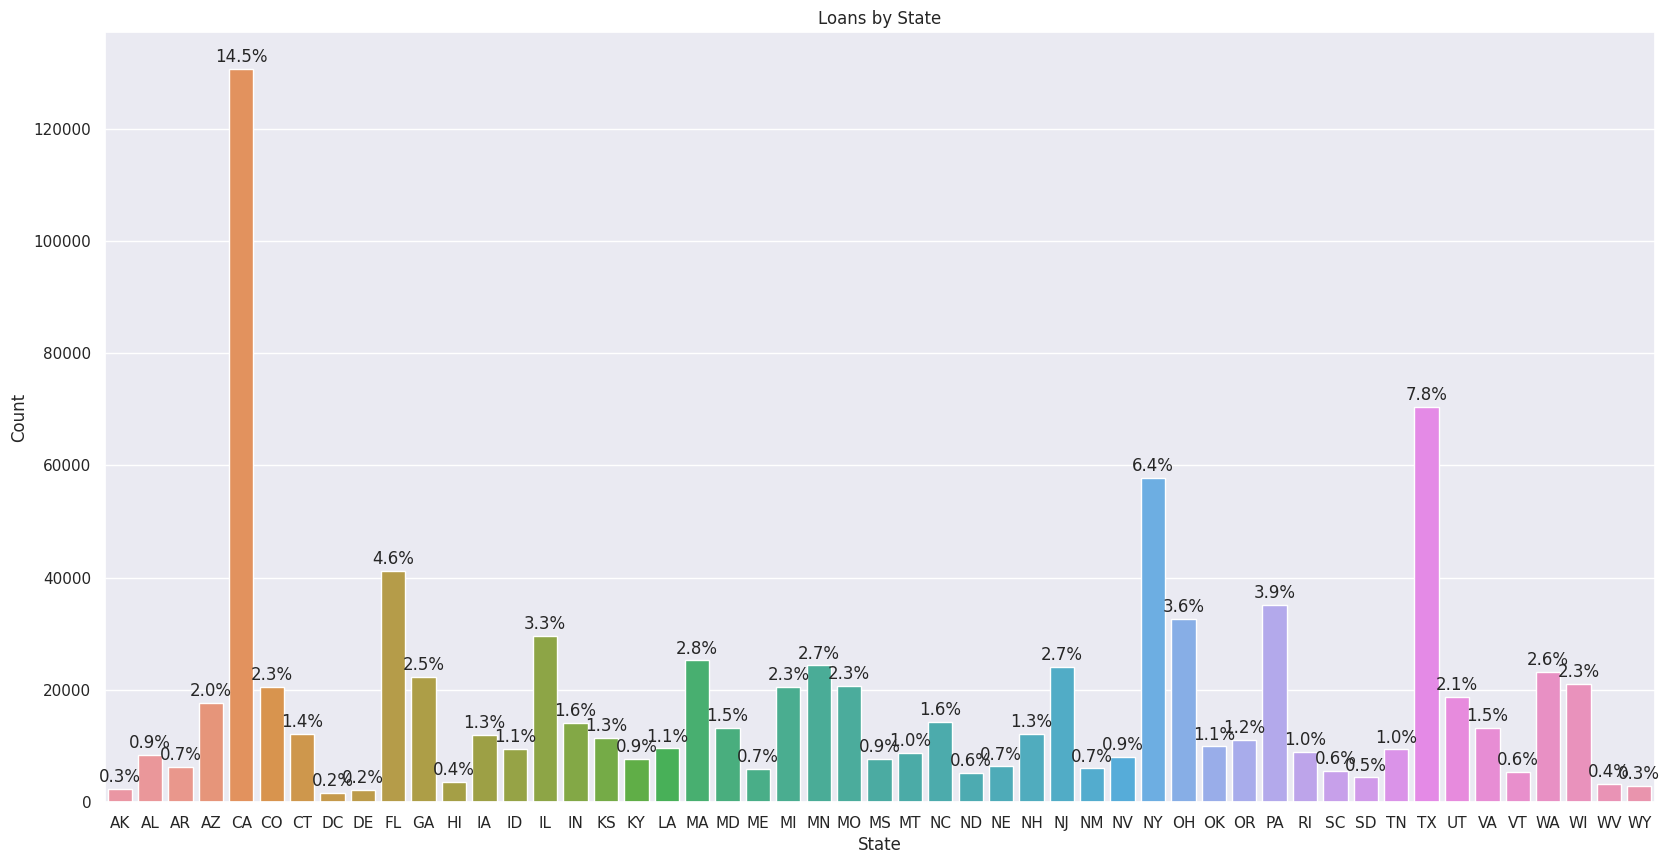

In [10]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="darkgrid")
sns.barplot(data=df_st1, x="State", y="Count")

for num in range(len(df_st1)):
    plt.annotate(str(df_st1["Frequency"][num])+"%",
                 xy=(num, df_st1["Count"][num]),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha="center")

plt.title("Loans by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

In [40]:
df_st2 = df.groupby(["State", "MIS_Status"])["LoanNr_ChkDgt"].count()
df_st2 = df_st2.unstack(level=-1)
df_st2 = pd.DataFrame(df_st2).reset_index()
df_st2 = df_st2.rename(columns={"CHGOFF":"Default_Y", "P I F":"Default_N"})
df_st2["Default_Yes"] = round((df_st2["Default_Y"] / (df_st2["Default_Y"] + df_st2["Default_N"])) * 100, 1)
df_st2["Default_No"] = round((df_st2["Default_N"] / (df_st2["Default_Y"] + df_st2["Default_N"])) * 100, 1)
df_st2["Default_Yes"] = df_st2["Default_Yes"].fillna(0)
df_st2["Default_No"] = df_st2["Default_No"].fillna(0)
df_st2 = df_st2.iloc[:,[0,3,4]]
df_st2.sort_values("Default_Yes", ascending=False).head(5)

MIS_Status,State,Default_Yes,Default_No
9,FL,27.4,72.6
7,DC,24.0,76.0
10,GA,24.0,76.0
33,NV,23.2,76.8
14,IL,22.7,77.3


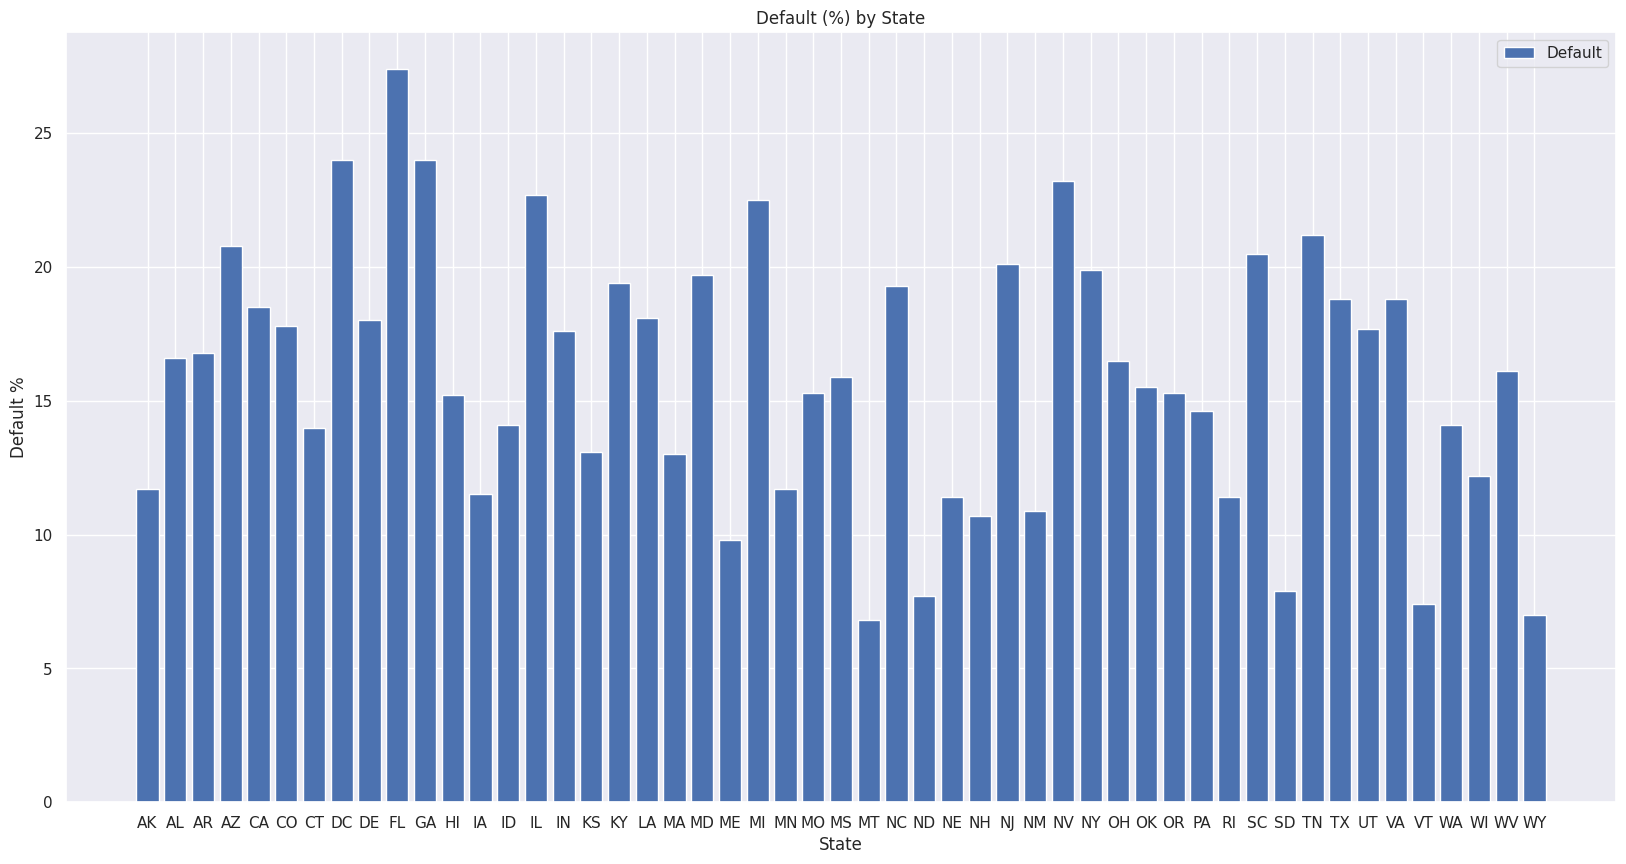

In [51]:
plt.figure(figsize=(20,10))
plt.bar(df_st2["State"], df_st2["Default_Yes"], label="Default")
# plt.bar(df_st2["State"], df_st2["Default_No"], bottom=df_st2["Default_Yes"], label="Non Default")

plt.title("Default (%) by State")
plt.xlabel("State")
plt.ylabel("Default %")
plt.legend()
plt.show()

La variable discreta State presenta datos que podrian ser valiosos para el modelo

### Zip
Código postal del prestatario

In [13]:
nrows = df.shape[0]
nvar = df["Zip"].nunique()
pvar = nvar / nrows

print(f"Numero de Zips: {nvar}")
print(f"Valores Distintos: {round(pvar * 100, 1)}%")

Numero de Zips: 33611
Valores Distintos: 3.7%


La variable Zip tiene 3.7% de valores distintos, que serian 33611 diferentes codigos postales

### Bank
Nombre del banco

In [14]:
nrows = df.shape[0]
nvar = df["Bank"].nunique()
pvar = nvar / nrows

print(f"Numero de Bancos: {nvar}")
print(f"Valores Distintos: {round(pvar * 100, 1)}%")

Numero de Bancos: 5802
Valores Distintos: 0.6%


La variable Bank tiene 0.6% de valores distintos, que serian 5802 diferentes bancos

### BankState
Estado del banco

In [21]:
df_bs1 = df.groupby("BankState")["LoanNr_ChkDgt"].count()
df_bs1 = pd.DataFrame(df_bs1).reset_index()
df_bs1 = df_bs1.rename(columns={"LoanNr_ChkDgt":"Count"})
df_bs1["Frequency"] = round((df_bs1["Count"] / df.shape[0]) * 100, 1)
df_bs1.sort_values("Count", ascending=False).head(5)

,BankState,Count,Frequency
5,CA,118116,13.1
30,NC,79514,8.8
17,IL,65908,7.3
38,OH,58461,6.5
45,SD,51095,5.7


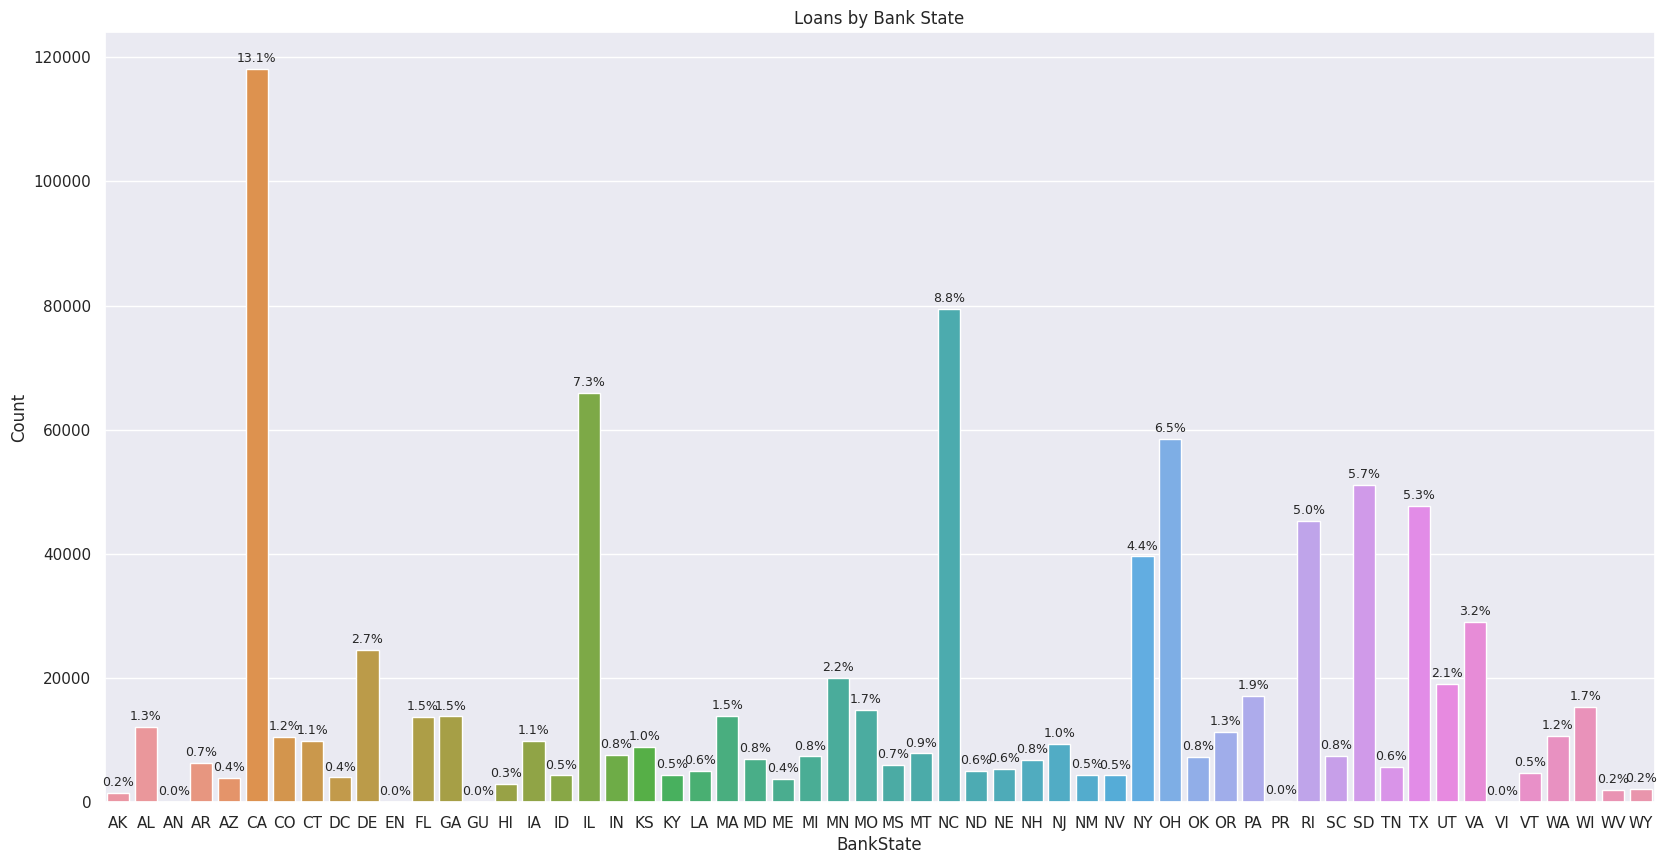

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_bs1, x="BankState", y="Count")

for num in range(len(df_bs1)):
    plt.annotate(str(df_bs1["Frequency"][num])+"%",
                 xy=(num, df_bs1["Count"][num]),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha="center",
                 size=9)

plt.title("Loans by Bank State")
plt.xlabel("BankState")
plt.ylabel("Count")
plt.show()

In [44]:
df_bs2 = df.groupby(["BankState", "MIS_Status"])["LoanNr_ChkDgt"].count()
df_bs2 = df_bs2.unstack(level=1)
df_bs2 = pd.DataFrame(df_bs2).reset_index()
df_bs2 = df_bs2.rename(columns={"CHGOFF":"Default_Y", "P I F":"Default_N"})
df_bs2["Default_Yes"] = round(df_bs2["Default_Y"] / (df_bs2["Default_Y"] + df_bs2["Default_N"]) * 100, 1)
df_bs2["Default_No"] = round(df_bs2["Default_N"] / (df_bs2["Default_Y"] + df_bs2["Default_N"]) * 100, 1)
df_bs2["Default_Yes"] = df_bs2["Default_Yes"].fillna(0)
df_bs2["Default_No"] = df_bs2["Default_No"].fillna(0)
df_bs2 = df_bs2.iloc[:,[0,3,4]]
df_bs2.sort_values("Default_Yes", ascending=False).head(5)

MIS_Status,BankState,Default_Yes,Default_No
49,VA,38.3,61.7
30,NC,29.3,70.7
9,DE,25.4,74.6
17,IL,22.3,77.7
5,CA,22.1,77.9


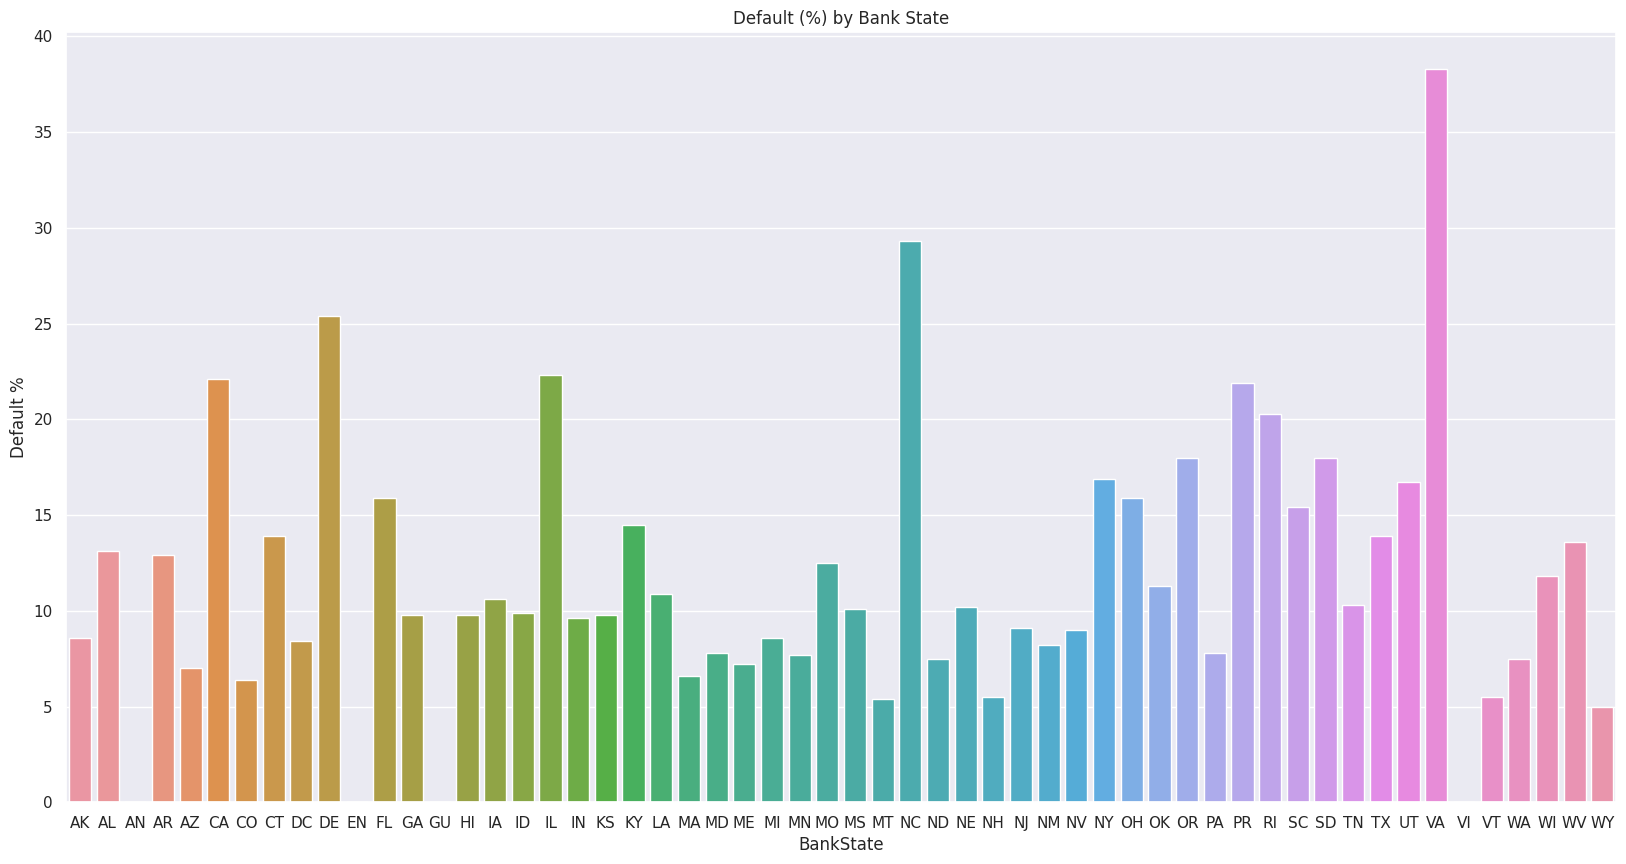

In [54]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_bs2, x="BankState", y="Default_Yes")

plt.title("Default (%) by Bank State")
plt.xlabel("BankState")
plt.ylabel("Default %")
plt.show()

La variable discreta BankState presenta datos que podrian ser valiosos para el modelo

### NAICS
Código del sistema de clasificación de la industria de América del Norte

In [53]:
naics = {"Sector": [11, 21, 22, 23, 31, 32, 33, 42, 44, 45, 48, 49,
                    51, 52, 53, 54, 55, 56, 61, 62, 71, 72, 81, 92],
         "Description": ["Agricultura, silvicultura, pesca y caza",
                        "Minería, explotación de canteras, y extracción de petróleo y gas",
                        "Utilidades",
                        "Construcción",
                        "Manufactura",
                        "Manufactura",
                        "Manufactura",
                        "Comercio al por mayor",
                        "Comercio minorista",
                        "Comercio minorista",
                        "Transporte y almacenamiento",
                        "Transporte y almacenamiento",
                        "Información",
                        "Finanzas y seguros",
                        "Bienes inmuebles y alquiler y arrendamiento",
                        "Servicios profesionales, científicos y técnicos",
                        "Gestión de sociedades y empresas",
                        "Servicios administrativos y de apoyo y gestión de residuos y remediación",
                        "Servicios educativos",
                        "Asistencia sanitaria y asistencia social",
                        "Artes, entretenimiento y recreación",
                        "Servicios de alojamiento y alimentación",
                        "Otros servicios (excepto administración pública)",
                        "Administración pública"]}

df_naics = pd.DataFrame(naics)
df_naics

,Sector,Description
0,11,"Agricultura, silvicultura, pesca y caza"
1,21,"Minería, explotación de canteras, y extracción..."
2,22,Utilidades
3,23,Construcción
4,31,Manufactura
5,32,Manufactura
6,33,Manufactura
7,42,Comercio al por mayor
8,44,Comercio minorista
9,45,Comercio minorista


### ApprovalDate
Fecha de emisión del compromiso de la SBA

### ApprovalF
Año fiscal del compromiso

### Term
Plazo del préstamo en meses

### NoEmp
Número de empleados de la empresa

### NewExist
1 = Negocio existente, 2 = Nuevo negocio

### CreateJob
Número de trabajos creados



### RetainedJob
Número de trabajos retenidos

### FranchiseCode
Código de franquicia: (00000 o 00001) = Sin franquicia

### UrbanRural
1 = Urbano, 2 = Rural, 0 = Indefinidos

### RevLineCr
Línea de crédito renovable: Y = Si, N = No

### LowDoc
Programa de préstamos: Y = Si, N = No

### ChgOffDate
La fecha en que un préstamo se declara en mora

### DisbursementDate
Fecha de desembolso

### DisbursementGross
Monto Bruto desembolsado

### BalanceGross
Saldo Bruto pendiente

### ChgOffPrinGr
Importe cancelado

### GrAppv
Importe bruto del préstamo aprobado por el banco

### SBA_Appv
Monto garantizado del préstamo aprobado por la SBA

### MIS_Status
Estado del préstamo cancelado = CHGOFF, Pagado en su totalidad = PIF

## Conclusiones

In [ ]:
drop_cols = ["LoanNr_ChkDgt", "Name", "City", "Zip", "Bank"]
cols = ["State", "BankState"]